---
---

# **Machine Learning Project: Income Prediction using Adult Dataset**

## **Project Overview**

### **Title**: Income Prediction using Adult Dataset
- **Objective**: To predict whether an individual's income exceeds $50K/year based on various demographic factors using machine learning techniques.
- **Dataset**: The dataset used is the "Adult Income" dataset. It contains information such as age, work class, education, marital status, occupation, race, sex, and more.
- **Key Steps Involved**:
  1. Data Loading
  2. Exploratory Data Analysis (EDA)
  3. Data Preprocessing
  4. Handling Categorical Variables
  5. Outlier Detection and Removal
  6. Feature Scaling
  7. Predictive Modeling
  8. Regression Analysis
  9. Clustering Analysis
  10. Feature Engineering

---

## **Step-by-Step Explanations**

### **1. Data Loading**
- **Purpose**: Load the dataset into a DataFrame for analysis.
- **Explanation**: The dataset is read using `pd.read_csv()` to check its structure and contents.

### **2. Exploratory Data Analysis (EDA)**
- **Objective**: Understand the dataset's structure and distribution.
- **Actions**:
  - **`df.head()`**: Displays the first few rows to get an overview of the dataset.
  - **`df.info()`**: Provides details about the data types and missing values.
  - **`df.describe()`**: Offers summary statistics of numerical columns.

### **3. Data Visualization**
- **Objective**: Visualize numerical and categorical variables.
- **Explanation**:
  - Histograms are used for numerical variables to understand their distribution.
  - Count plots are used for categorical variables to show the frequency of each category.

### **4. Missing Values Check and Handling**
- **Purpose**: Detect and handle missing values to ensure a clean dataset.
- **Strategy**:
  - **`df.isnull().sum()`**: Identifies the number of missing values per column.
  - Missing values are filled with the mean (numerical) or mode (categorical) using `fillna()`.

### **5. Duplicate Values Check and Removal**
- **Explanation**: Checking for duplicate entries using `df.duplicated().sum()`.
- **Action**: Remove duplicate rows using `df.drop_duplicates()` to avoid skewing the analysis.

### **6. Data Distribution Check**
- **Purpose**: Visualize the distribution of numerical features.
- **Explanation**: Histograms help detect skewness or outliers in numerical data.

### **7. Correlation Analysis**
- **Objective**: Identify relationships between features using a correlation matrix.
- **Visualization**: A heatmap shows the correlation coefficients, indicating the strength of relationships between variables.

### **8. Handling Categorical Variables**
- **Purpose**: Convert categorical variables to numerical using One-Hot Encoding (`pd.get_dummies()`).
- **Importance**: Many machine learning algorithms require numerical inputs.

### **9. Outlier Detection and Removal**
- **Method**: Interquartile Range (IQR) method.
  - **Formula**:
    - **IQR** = Q3 - Q1
    - Lower bound: Q1 - 1.5 * IQR
    - Upper bound: Q3 + 1.5 * IQR
  - Outliers are identified using these bounds and removed.

### **10. Feature Scaling**
- **Purpose**: Standardize features using `StandardScaler` to ensure equal weightage across features.
- **Importance**: Scaled features help in better model performance, especially for distance-based algorithms.

### **11. Predictive Modeling**
- **Objective**: Build a Random Forest model for classification.
- **Explanation**:
  - **Train-Test Split**: Data is split into training (80%) and testing (20%) sets using `train_test_split`.
  - **Model Training**: RandomForestClassifier is trained on the data.
  - **Prediction**: Model predicts labels on the test set.

### **12. Regression Analysis**
- **Objective**: Implement Linear Regression to predict income.
- **Explanation**:
  - **Model Training**: Linear Regression model is fit on training data.
  - **Prediction**: Income predictions are made for the test data.

### **13. Clustering Analysis**
- **Objective**: Use K-Means clustering to segment data into clusters based on features.
- **Explanation**:
  - **K-Means Algorithm**: Groups data points into k clusters based on feature similarity.
  - **Output**: Cluster labels indicating the segment each data point belongs to.

### **14. Feature Engineering**
- **Objective**: Create new features to enhance model performance.
- **Example**: A new feature `Total_Capital` is created by summing `Capital_Gain` and `Capital_Loss`.

### **15. Final Dataset Preparation**
- **Explanation**: The cleaned and preprocessed dataset is saved as 'preprocessed_data.csv' for future analysis or modeling tasks.

---

## **Conclusion**
This project demonstrates the end-to-end process of data analysis and machine learning, from loading and exploring the dataset to preprocessing, modeling, and evaluation. Various techniques such as handling missing values, scaling, feature engineering, and using predictive models (Random Forest, Linear Regression, K-Means Clustering) have been applied to predict income levels and uncover insights from the dataset. The final dataset is prepared and saved for further analysis.

---

---

# 📚 Import Necessary Libraries

Import essential libraries for data manipulation and visualization, such as `pandas`, `numpy`, `matplotlib`, and `seaborn`. These libraries provide powerful tools for data analysis and help in visualizing data trends effectively.

In [ ]:
# 1. Import Necessary Libraries
# We import essential libraries for data analysis and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

---

# 📥 Load the Data

Load the dataset from the CSV file (`adult_test.csv`) using `pd.read_csv()`. This step initializes the data into a pandas DataFrame, allowing us to manipulate and analyze the dataset easily.

In [ ]:
# 2. Load the Data
# We load the dataset from a CSV file named 'adult_test.csv' into a pandas DataFrame.

In [ ]:
df = pd.read_csv('/content/adult_test.csv')

---

---

# 🔍 Inspect the Data

**Why?**  
Inspecting the dataset helps us understand its structure, identify the data types of each column, and detect potential issues like missing values.

- `df.head()`: Displays the first few rows of the dataset.
- `df.info()`: Provides information about the data types and non-null counts of each column.
- `df.describe()`: Summarizes the statistics of numerical columns, such as mean, median, and standard deviation.

In [ ]:
# 3. Inspect the Data
# We inspect the dataset to understand its structure and contents.
# This helps us identify potential issues and plan our data preprocessing steps.

In [ ]:
# Let's take a quick look at the first few rows of our dataset to understand its structure.

In [ ]:
df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [ ]:
# Next, we'll check the information about each column in our dataset, including data types and missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16282 non-null  object 
 1   Workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education_Num   16281 non-null  float64
 5   Martial_Status  16281 non-null  object 
 6   Occupation      15314 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital_Gain    16281 non-null  float64
 11  Capital_Loss    16281 non-null  float64
 12  Hours_per_week  16281 non-null  float64
 13  Country         16007 non-null  object 
 14  Target          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [ ]:
# Now, we'll get a summary of the numerical columns in our dataset to understand their distribution and statistics.

In [ ]:
df.describe()

,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


---

---

# 📊 Exploratory Data Analysis (EDA)

**Why?**  
EDA is crucial for understanding the distribution of variables, detecting outliers, and gaining insights from data before modeling.

- For **categorical variables**: We use bar charts to visualize the frequency of each category using `sns.countplot()`.
- For **numerical variables**: We create histograms with KDE (Kernel Density Estimation) curves to understand their distribution using `sns.histplot()`.

**Significance**:  
These visualizations help in identifying imbalances, skewness, and potential issues in the data.

In [ ]:
# 4. Visualize the Dataset
# Visualizing the dataset helps us understand the distribution of data.
# For numerical variables, we create histograms with kernel density estimation (KDE) curves.
# For categorical variables, we create bar charts to show the distribution of different categories.
# These visualizations aid in explaining the dataset to others and support the presentation of algorithms.

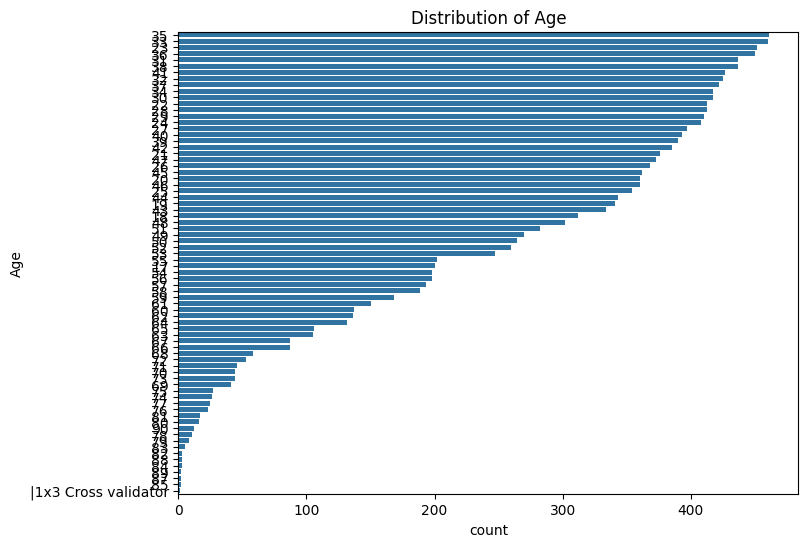

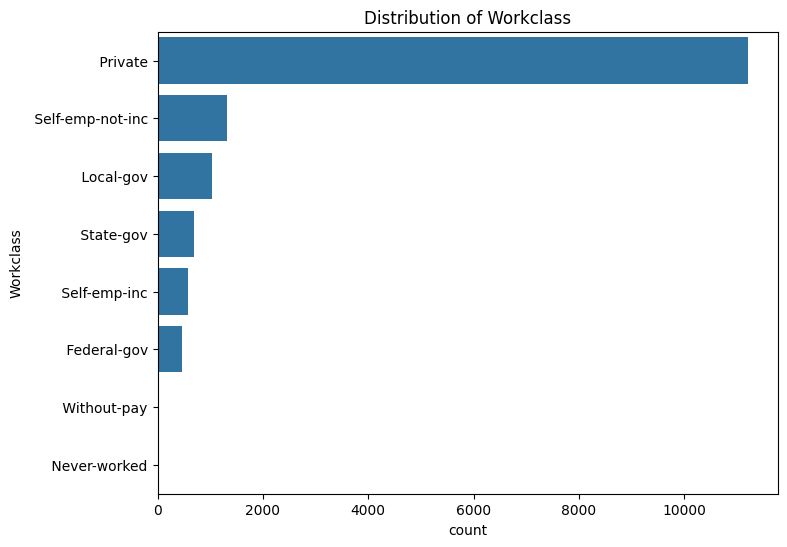

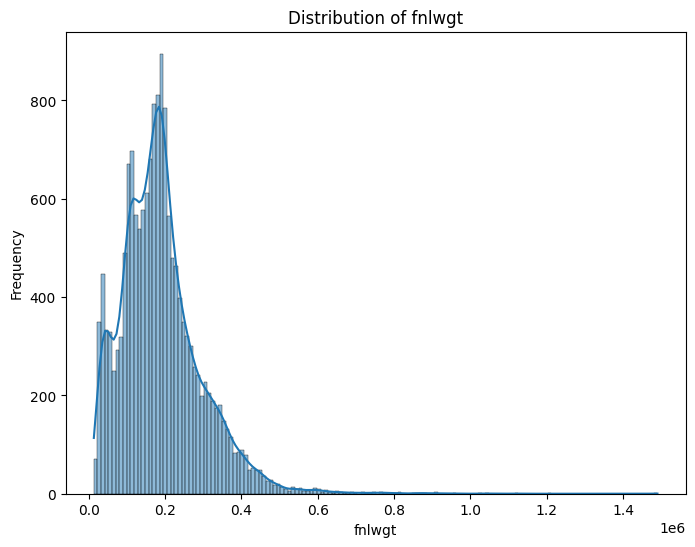

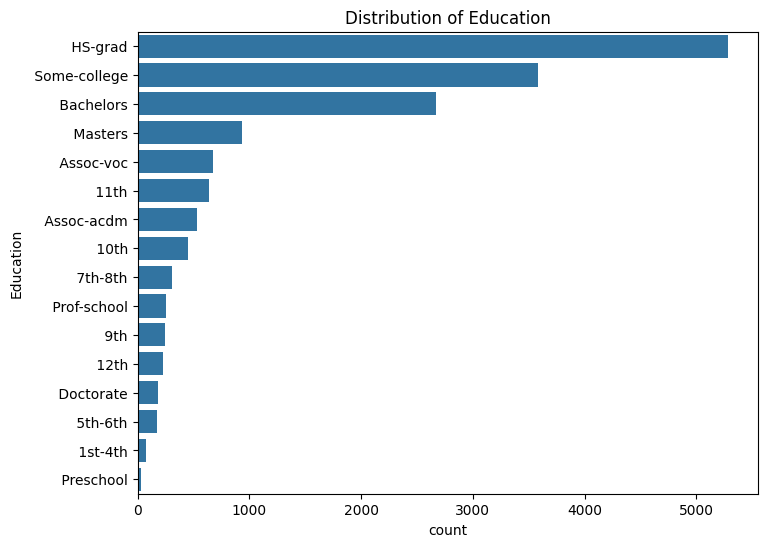

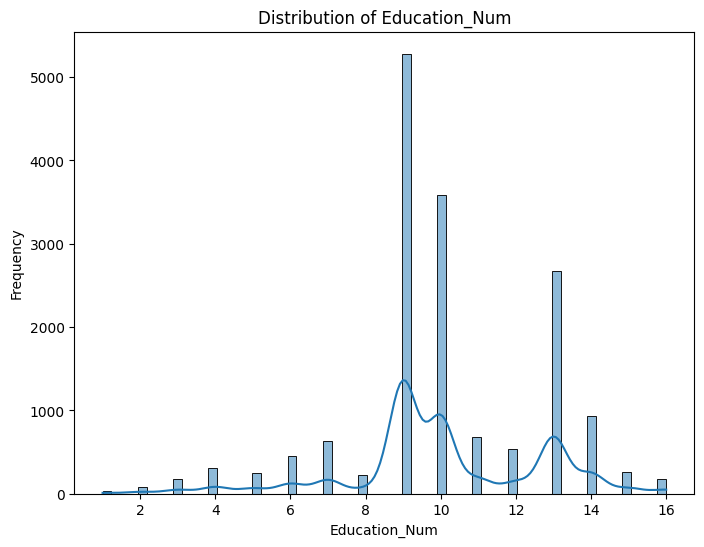

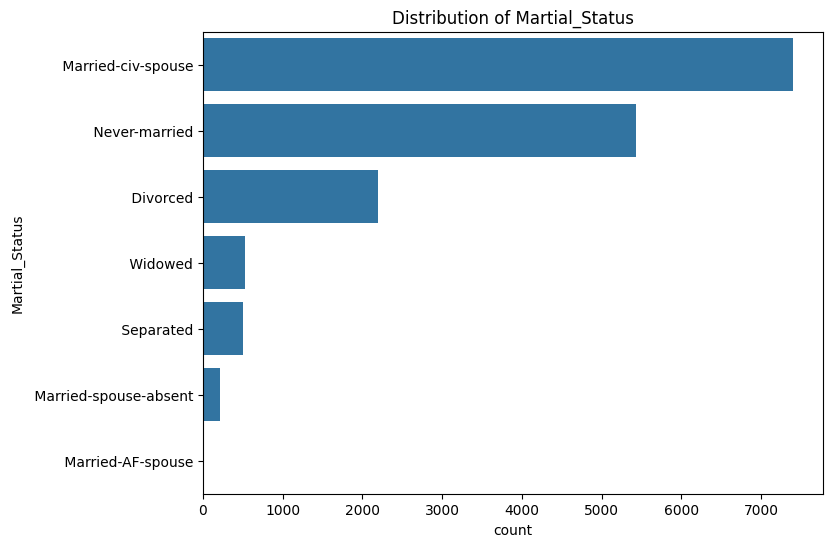

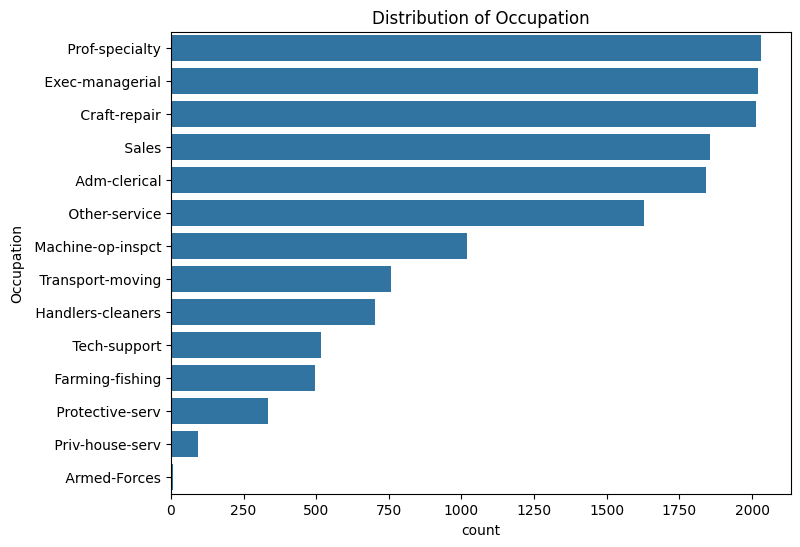

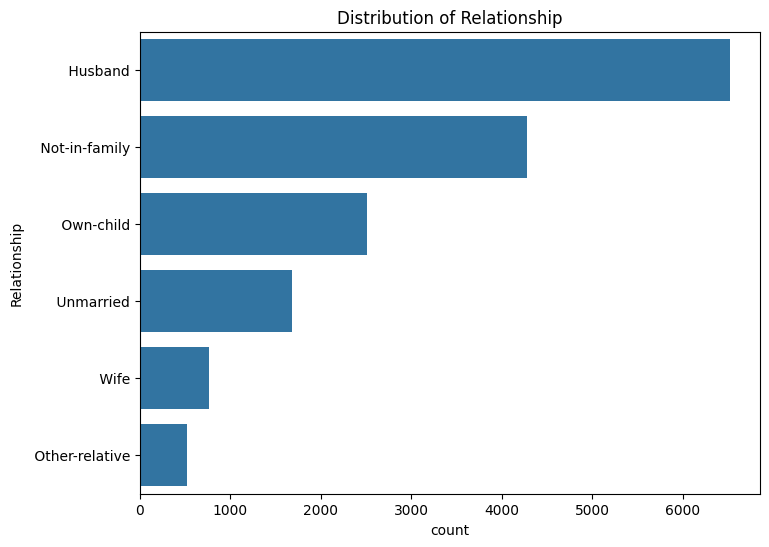

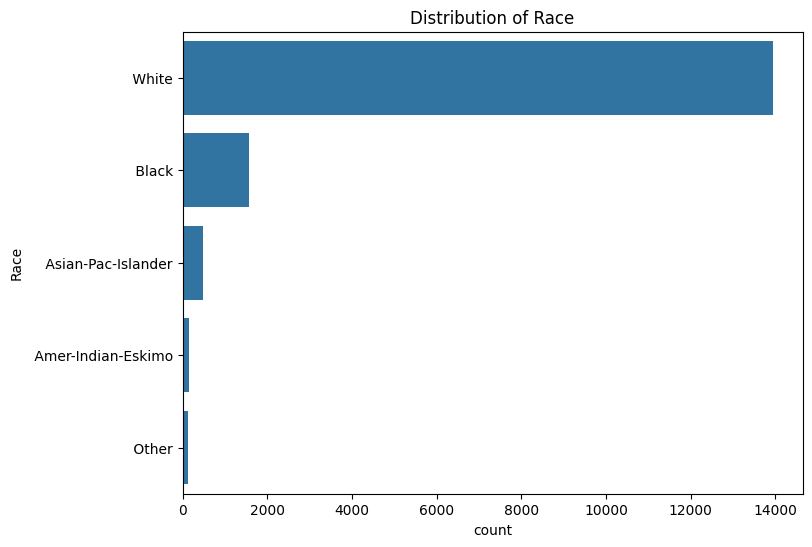

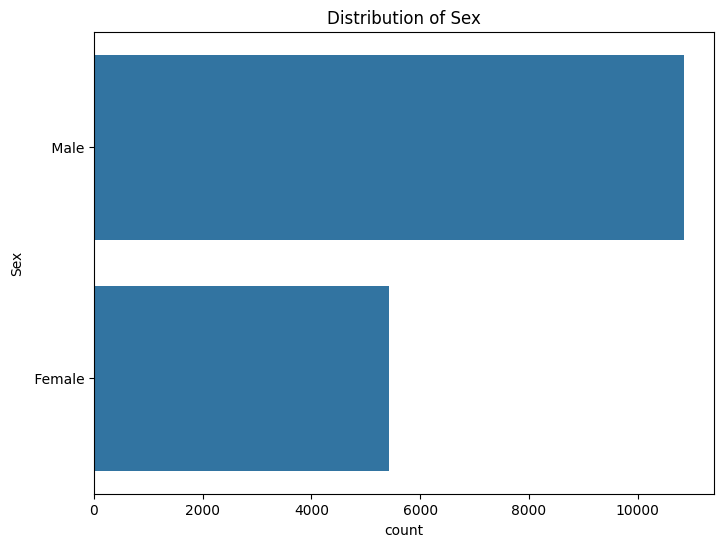

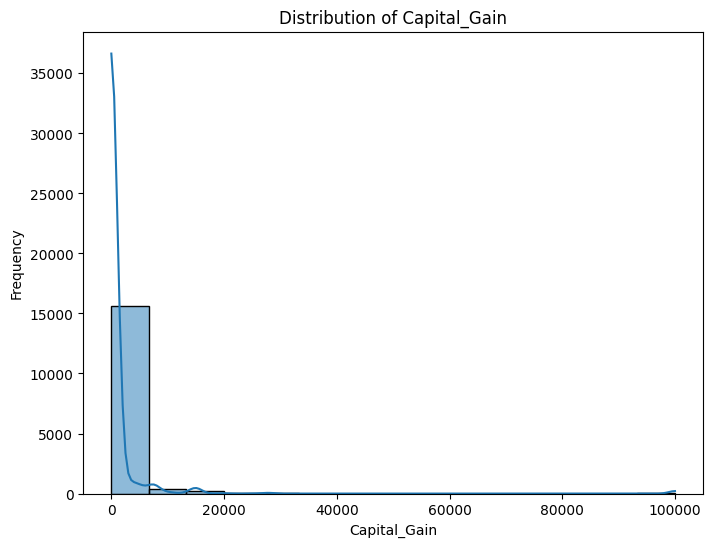

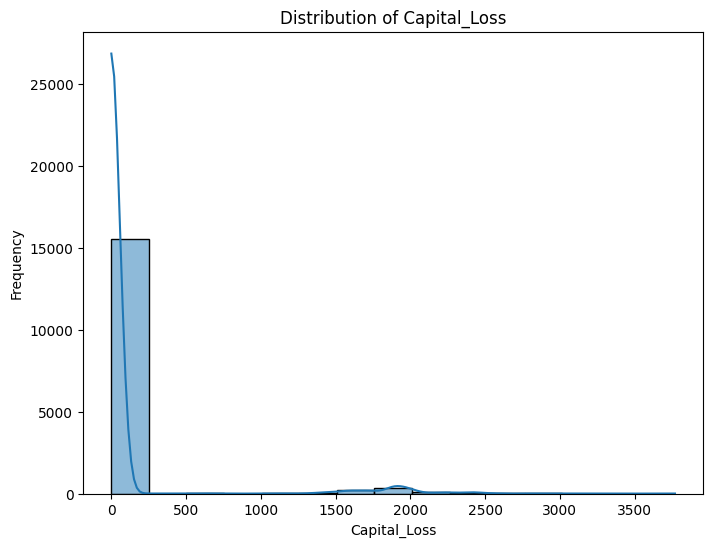

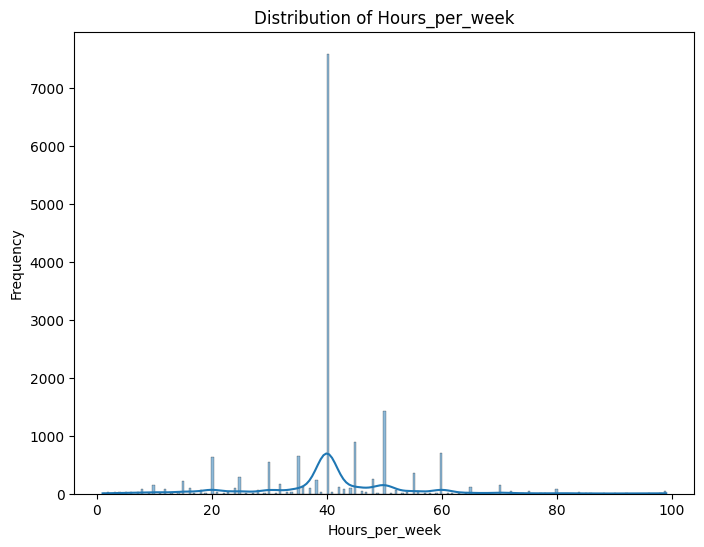

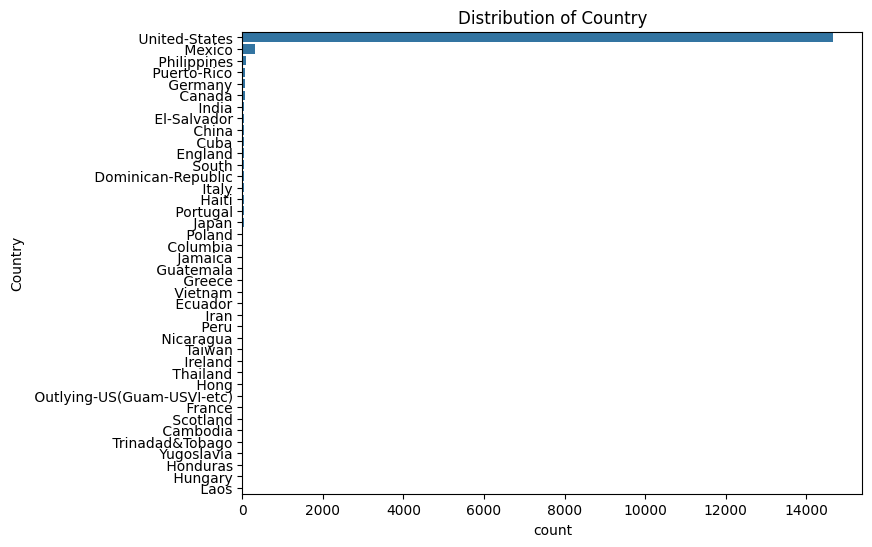

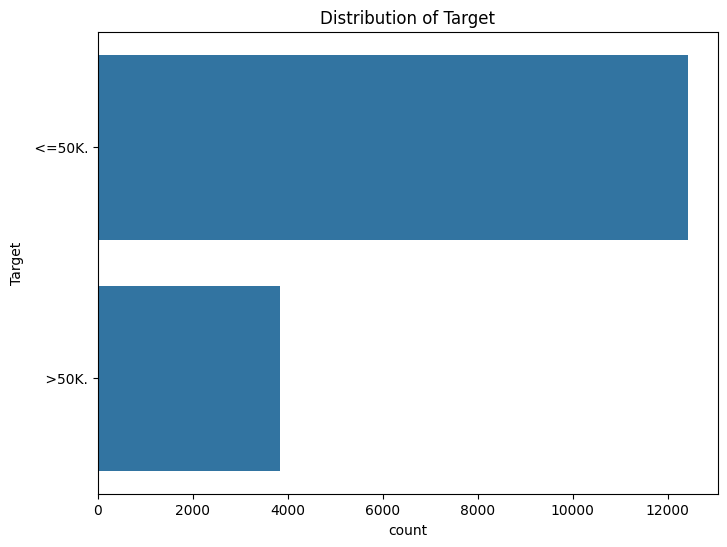

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        # For categorical variables
        plt.figure(figsize=(8, 6))
        sns.countplot(y=column, data=df, order=df[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.show()
    else:
        # For numerical variables
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

---

---

# ❓ Check for Missing Values

**Why?**  
Missing values can introduce bias and affect model performance if not handled appropriately. We use `df.isnull().sum()` to check the count of missing values in each column.

In [ ]:
# 5. Check for Missing Values
# We check for missing values in the dataset.
# Missing values can affect the analysis, so it's important to handle them appropriately.

In [ ]:
missing_values = df.isnull().sum()

---

---

# 🛠️ Handle Missing Values

**Why?**  
Handling missing values is essential for maintaining the integrity of the dataset.

- For **categorical variables**: Fill missing values with the mode (most frequent value) using `df[column].fillna(mode)`.
- For **numerical variables**: Fill missing values with the mean using `df[column].fillna(mean)`.

This approach ensures the dataset remains comprehensive without introducing significant bias.

In [ ]:
# 6. Handle Missing Values
# Depending on the nature of missing values and the dataset, we decide on a strategy to handle them.
# Common strategies include filling missing values with the mean or median for numerical variables
# and mode for categorical variables, or dropping rows or columns with missing values.
# We choose the strategy based on the distribution and importance of each column.
# Here, we'll consider the mean for numerical variables and mode for categorical variables.

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)


---

---

# 🔍 Check for Duplicate Values

**Why?**  
Duplicate entries can distort the analysis by over-representing certain data points. We use `df.duplicated().sum()` to check for duplicate rows.

In [ ]:
# 7. Check for Duplicate Values
# We check for duplicate rows in the dataset.
# Duplicate values can skew analysis results, so it's important to identify and remove them.

In [ ]:
duplicate_rows = df.duplicated().sum()

---

---

# ✂️ Remove Duplicate Values

**Why?**  
Removing duplicate rows prevents skewing of results and ensures a clean dataset. We use `df.drop_duplicates(inplace=True)` to eliminate any duplicate entries.

In [ ]:
# 8. Remove Duplicate Values
# If duplicate rows are found, we remove them from the dataset.

In [ ]:
df.drop_duplicates(inplace=True)

---

---

# 📈 Check Data Distribution

Visualize the distribution of all numerical features using histograms. This helps us detect skewness and potential outliers in the dataset.

- `df.hist()`: Creates histograms for each numerical column to visualize their distribution.
- `plt.show()`: Displays the plots.

In [ ]:
# 9. Check Data Distribution
# We check the distribution of data in each column.
# This helps identify skewness, outliers, or other distribution characteristics.

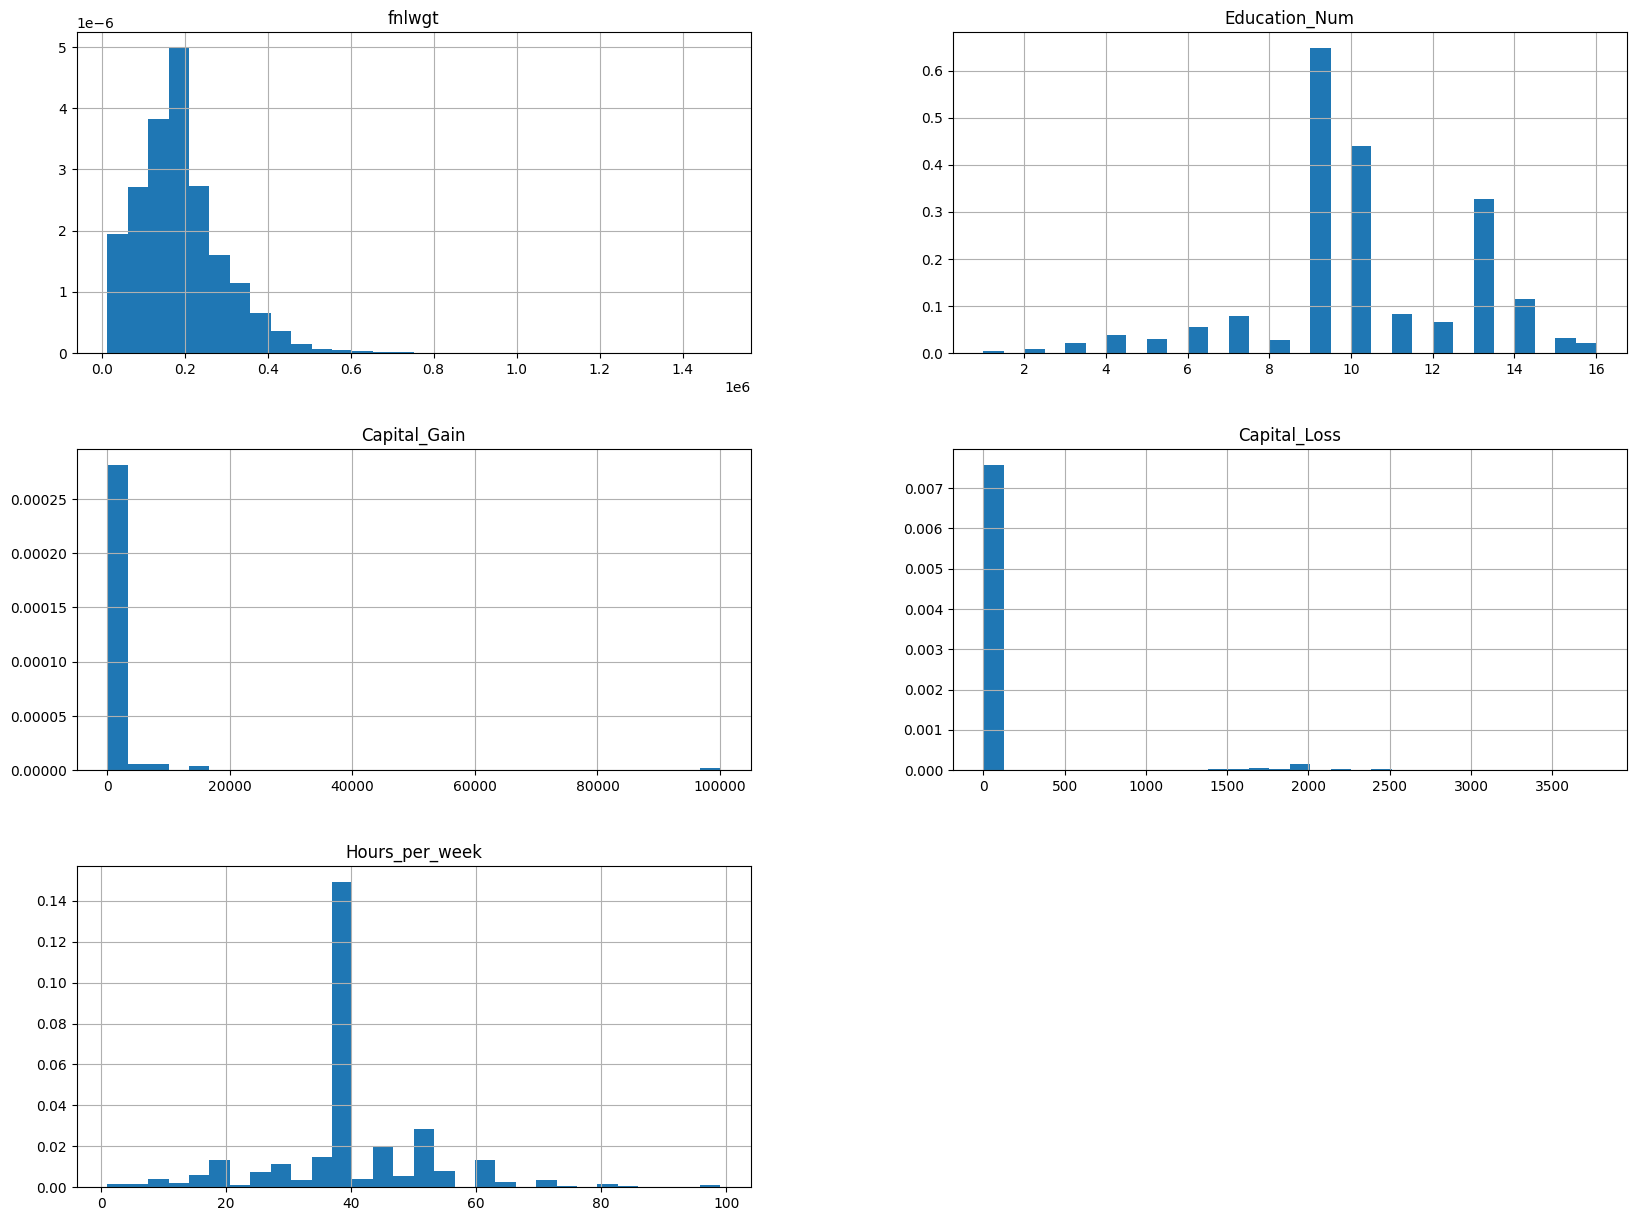

In [ ]:
df.hist(bins=30, figsize=(20,15), density=True)
plt.show()

----

---

# 🔬 Check Correlations

**Why?**  
Understanding the correlation between features helps identify multicollinearity and determine which features may be more influential.

- We compute the correlation matrix using `df.corr()`.
- A heatmap visualization (`sns.heatmap()`) displays the strength of relationships between features.

In [ ]:
# 10. Check Correlations
# We check the correlation between different variables in the dataset.
# This helps identify relationships between variables, which is useful for analysis and modeling.
# We visualize the correlation matrix using a heatmap for better understanding.

<ipython-input-25-f96464a2691e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


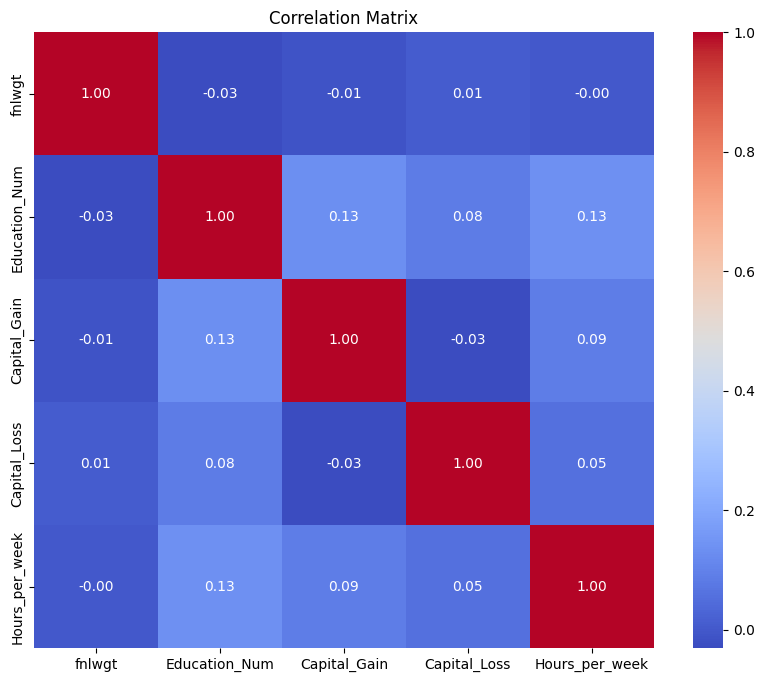

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

---

---

# 🔢 Handle Categorical Variables

**Why?**  
Machine learning algorithms require numerical inputs. We use **One-Hot Encoding** via `pd.get_dummies()` to convert categorical variables into numerical format.

- This process creates new binary columns for each category while removing one category to avoid the **dummy variable trap** (`drop_first=True`).

In [ ]:
# 11. Handle Categorical Variables
# If the dataset contains categorical variables, we need to encode them into numerical values.
# This is necessary for machine learning algorithms to process categorical data.
# We use techniques like one-hot encoding or label encoding to convert categorical variables.

In [ ]:
df = pd.get_dummies(df, drop_first=True)

---

---

# 🚨 Outlier Detection

**Why?**  
Outliers can significantly affect the model's performance by skewing the results. We detect outliers using the **Interquartile Range (IQR)** method:

- **IQR Formula**: \( \text{IQR} = Q3 - Q1 \)
- Data points below \( Q1 - 1.5 \times \text{IQR} \) or above \( Q3 + 1.5 \times \text{IQR} \) are considered outliers.

In [ ]:
# 12. Outlier Detection
# Outliers can significantly impact analysis and statistical models.
# We use methods like the IQR score or Z-score to detect and handle outliers.
# Here, we remove outliers based on the IQR score.

In [ ]:
Q1 = df.quantile(0.25)

In [ ]:
Q3 = df.quantile(0.75)

In [ ]:
IQR = Q3 - Q1

In [ ]:
# Identify outliers based on the IQR score
outlier_condition = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

---

---

# 📏 Feature Scaling

**Why?**  
Scaling standardizes the features to ensure they contribute equally to the model's performance. We use **Standardization** via `StandardScaler()`:

- **Standardization Formula**: \( z = \frac{x - \text{mean}}{\text{std}} \)
- This technique centers the data around 0 with a standard deviation of 1.

In [ ]:
# 13. Feature Scaling
# If the dataset contains features with different scales, we need to scale them to a standard scale.
# This ensures that all features contribute equally to the analysis.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

---

---

# 📦 Save the Preprocessed Dataset

We save the cleaned and scaled dataset to a CSV file (`preprocessed_data.csv`). This allows us to use the preprocessed data for various machine learning tasks without repeating the preprocessing steps.

In [ ]:
# 14. Final Dataset
# After preprocessing, we have a clean and standardized dataset ready for analysis and modeling.
# This dataset can now be used for various machine learning tasks such as classification or regression.

In [ ]:
# Save the preprocessed data to a CSV file
df_scaled.to_csv('preprocessed_data.csv', index=False)

---
---

---
---

# POSSIBLE TASKS FROM THE DATASET

# PREDICTIVE MODELING

# 📈 Random Forest Classification

- **Objective**: To classify whether an individual's income is greater than 50K.
- **Approach**: We split the dataset into training and testing sets, then use the **RandomForestClassifier** for prediction.

In [ ]:
# Import necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Assuming df contains your preprocessed dataset and 'Target' is the column containing target labels

In [ ]:
X = df.drop(columns=['Target_ >50K.'])  # Features

In [ ]:
y = df['Target_ >50K.']  # Target labels

In [ ]:
# Split the data into training and testing sets
# Assuming X contains input features and y contains target labels
# We split the data into 80% training and 20% testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check the unique values of the target variable
print(y_train.unique())

[-0.55622641  1.79782905]


In [ ]:
# Define thresholds to categorize the target variable

In [ ]:
threshold_low = -1  # Define the lower threshold for the "low" category

In [ ]:
threshold_high = 1  # Define the upper threshold for the "high" category

In [ ]:
# Convert continuous target variable into categorical

In [ ]:
y_train_categorical = pd.cut(y_train, bins=[float('-inf'), threshold_low, threshold_high, float('inf')],
                              labels=['low', 'medium', 'high'])


In [ ]:
# Train RandomForestClassifier with the categorical target variable

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train_categorical)

RandomForestClassifier()

In [ ]:
# Predict labels for test set

In [ ]:
y_pred = clf.predict(X_test)

---

---

# 📈 Linear Regression

- **Objective**: To predict continuous values based on input features.
- **Approach**: We apply **Linear Regression** to understand relationships between features and the target variable.

# regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Assuming X contains input features and y contains target values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train a Linear Regression model

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict values for test set

In [ ]:
y_pred = model.predict(X_test)

---

---

# 📈 K-Means Clustering

- **Objective**: To group similar data points based on their attributes.
- **Approach**: We use **K-Means** with 3 clusters to categorize the dataset into distinct groups.

# clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Assuming X contains input features

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# Get cluster labels for each data point

In [ ]:
cluster_labels = kmeans.labels_

---

---

# 🛠️ Feature Engineering

- **Objective**: To create new features that can enhance model performance.
- **Example**: We create a new feature `Total_Capital` by adding `Capital_Gain` and `Capital_Loss`. This captures the total capital information in a single feature.

# FEATURE ENGINEERING

In [ ]:
# Assuming df contains the dataset
# Example feature engineering steps:
# Creating a new feature Total_Capital by adding Capital_Gain and Capital_Loss

In [ ]:
df['Total_Capital'] = df['Capital_Gain'] + df['Capital_Loss']

In [ ]:
# Save the Preprocessed Data to a CSV file

In [ ]:
df.to_csv('preprocessed_data.csv', index=False)

----

# 📝 Final Notes

- The project involves a comprehensive analysis of the adult income dataset with various preprocessing steps to prepare data for machine learning tasks.
- Different models such as **Random Forest, Linear Regression,** and **K-Means Clustering** provide a holistic approach to understanding and predicting income classifications.
- Saving the preprocessed data ensures reproducibility and efficient use of resources in subsequent analysis stages.

---
---